# Anaylizing NBA Game stats 2014-2019

In [1]:
import sqlite3 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
from scipy import stats # significance levels, normality
import itertools

plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore') # hide matplotlib warnings

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [2]:
game_detail_df = pd.read_csv('Datasets/games_details.csv')
games_df = pd.read_csv('Datasets/games.csv')
players_df = pd.read_csv('Datasets/players.csv')
ranking_df = pd.read_csv('Datasets/ranking.csv')
teams_df = pd.read_csv('Datasets/teams.csv')

# EDA on our Data

### Inspecting game_detail_df

In [3]:
game_detail_df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,40800405,1610612747,LAL,Los Angeles,2772,Trevor Ariza,F,NaN,41:29,5.0,...,1.0,4.0,5.0,1.0,2.0,0.0,3.0,3.0,15.0,12.0
1,40800405,1610612747,LAL,Los Angeles,2200,Pau Gasol,F,NaN,42:09,6.0,...,4.0,11.0,15.0,3.0,0.0,4.0,1.0,2.0,14.0,15.0
2,40800405,1610612747,LAL,Los Angeles,101115,Andrew Bynum,C,NaN,16:54,3.0,...,4.0,1.0,5.0,0.0,1.0,0.0,1.0,5.0,6.0,-6.0
3,40800405,1610612747,LAL,Los Angeles,977,Kobe Bryant,G,NaN,43:18,10.0,...,0.0,6.0,6.0,5.0,2.0,4.0,1.0,2.0,30.0,14.0
4,40800405,1610612747,LAL,Los Angeles,965,Derek Fisher,G,NaN,31:59,4.0,...,0.0,4.0,4.0,2.0,0.0,0.0,1.0,4.0,13.0,16.0


In [4]:
game_detail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561733 entries, 0 to 561732
Data columns (total 28 columns):
GAME_ID              561733 non-null int64
TEAM_ID              561733 non-null int64
TEAM_ABBREVIATION    561733 non-null object
TEAM_CITY            561733 non-null object
PLAYER_ID            561733 non-null int64
PLAYER_NAME          561733 non-null object
START_POSITION       215354 non-null object
COMMENT              89924 non-null object
MIN                  471808 non-null object
FGM                  471808 non-null float64
FGA                  471808 non-null float64
FG_PCT               471808 non-null float64
FG3M                 471808 non-null float64
FG3A                 471808 non-null float64
FG3_PCT              471808 non-null float64
FTM                  471808 non-null float64
FTA                  471808 non-null float64
FT_PCT               471808 non-null float64
OREB                 471808 non-null float64
DREB                 471808 non-null float64
RE

Removing unnecessary Columns from our game_detail_df

In [5]:
game_detail_df.drop(columns=['COMMENT', 'PLUS_MINUS', 'START_POSITION', 'TEAM_CITY'], inplace=True)

In [6]:
game_detail_df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_ID,PLAYER_NAME,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS
0,40800405,1610612747,LAL,2772,Trevor Ariza,41:29,5.0,12.0,0.417,2.0,...,0.5,1.0,4.0,5.0,1.0,2.0,0.0,3.0,3.0,15.0
1,40800405,1610612747,LAL,2200,Pau Gasol,42:09,6.0,9.0,0.667,0.0,...,0.5,4.0,11.0,15.0,3.0,0.0,4.0,1.0,2.0,14.0
2,40800405,1610612747,LAL,101115,Andrew Bynum,16:54,3.0,11.0,0.273,0.0,...,0.0,4.0,1.0,5.0,0.0,1.0,0.0,1.0,5.0,6.0
3,40800405,1610612747,LAL,977,Kobe Bryant,43:18,10.0,23.0,0.435,2.0,...,1.0,0.0,6.0,6.0,5.0,2.0,4.0,1.0,2.0,30.0
4,40800405,1610612747,LAL,965,Derek Fisher,31:59,4.0,7.0,0.571,1.0,...,1.0,0.0,4.0,4.0,2.0,0.0,0.0,1.0,4.0,13.0


In [7]:
# Create a new Column called DF_SCORE based on
game_detail_df["DF_SCORE"] = round((game_detail_df.PTS + game_detail_df.FG3M *0.5 + game_detail_df.REB *1.25 + game_detail_df.AST * 1.5 + game_detail_df.STL *2 + game_detail_df.BLK *2 - game_detail_df.TO * 0.5),2)

In [8]:
game_detail_df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_ID,PLAYER_NAME,MIN,FGM,FGA,FG_PCT,FG3M,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,DF_SCORE
0,40800405,1610612747,LAL,2772,Trevor Ariza,41:29,5.0,12.0,0.417,2.0,...,1.0,4.0,5.0,1.0,2.0,0.0,3.0,3.0,15.0,26.25
1,40800405,1610612747,LAL,2200,Pau Gasol,42:09,6.0,9.0,0.667,0.0,...,4.0,11.0,15.0,3.0,0.0,4.0,1.0,2.0,14.0,44.75
2,40800405,1610612747,LAL,101115,Andrew Bynum,16:54,3.0,11.0,0.273,0.0,...,4.0,1.0,5.0,0.0,1.0,0.0,1.0,5.0,6.0,13.75
3,40800405,1610612747,LAL,977,Kobe Bryant,43:18,10.0,23.0,0.435,2.0,...,0.0,6.0,6.0,5.0,2.0,4.0,1.0,2.0,30.0,57.50
4,40800405,1610612747,LAL,965,Derek Fisher,31:59,4.0,7.0,0.571,1.0,...,0.0,4.0,4.0,2.0,0.0,0.0,1.0,4.0,13.0,21.00


In [9]:
game_detail_df.dropna(axis='rows', inplace=True)

In [10]:
game_detail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471808 entries, 0 to 561732
Data columns (total 25 columns):
GAME_ID              471808 non-null int64
TEAM_ID              471808 non-null int64
TEAM_ABBREVIATION    471808 non-null object
PLAYER_ID            471808 non-null int64
PLAYER_NAME          471808 non-null object
MIN                  471808 non-null object
FGM                  471808 non-null float64
FGA                  471808 non-null float64
FG_PCT               471808 non-null float64
FG3M                 471808 non-null float64
FG3A                 471808 non-null float64
FG3_PCT              471808 non-null float64
FTM                  471808 non-null float64
FTA                  471808 non-null float64
FT_PCT               471808 non-null float64
OREB                 471808 non-null float64
DREB                 471808 non-null float64
REB                  471808 non-null float64
AST                  471808 non-null float64
STL                  471808 non-null float6

In [11]:
#cleaning our column for our join and then Hypothesis
game_player_detail = game_detail_df[['GAME_ID', 'TEAM_ID', 'PLAYER_ID', 'PLAYER_NAME', 'MIN', 'DF_SCORE']]
game_player_detail

,GAME_ID,TEAM_ID,PLAYER_ID,PLAYER_NAME,MIN,DF_SCORE
0,40800405,1610612747,2772,Trevor Ariza,41:29,26.25
1,40800405,1610612747,2200,Pau Gasol,42:09,44.75
2,40800405,1610612747,101115,Andrew Bynum,16:54,13.75
3,40800405,1610612747,977,Kobe Bryant,43:18,57.50
4,40800405,1610612747,965,Derek Fisher,31:59,21.00
5,40800405,1610612747,1885,Lamar Odom,31:44,31.50
6,40800405,1610612747,2575,Luke Walton,14:07,6.00
7,40800405,1610612747,200770,Jordan Farmar,13:38,3.50
8,40800405,1610612747,2756,Sasha Vujacic,4:42,0.00
12,40800405,1610612753,2045,Hedo Turkoglu,42:05,20.50


### Inspecting game_df 

In [12]:
games_df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2014-06-15,41300405,Final,1610612759,1610612748,2013,1610612759,104.0,0.474,0.783,...,25.0,40.0,1610612748,87.0,0.400,0.741,0.280,14.0,41.0,1
1,2014-06-12,41300404,Final,1610612748,1610612759,2013,1610612748,86.0,0.451,0.650,...,13.0,27.0,1610612759,107.0,0.571,0.720,0.429,25.0,44.0,0
2,2014-06-10,41300403,Final,1610612748,1610612759,2013,1610612748,92.0,0.516,0.750,...,17.0,26.0,1610612759,111.0,0.594,0.813,0.450,21.0,29.0,0
3,2014-06-08,41300402,Final,1610612759,1610612748,2013,1610612759,96.0,0.439,0.600,...,26.0,37.0,1610612748,98.0,0.529,0.762,0.421,16.0,38.0,0
4,2014-06-05,41300401,Final,1610612759,1610612748,2013,1610612759,110.0,0.588,0.773,...,30.0,39.0,1610612748,95.0,0.474,0.818,0.414,16.0,29.0,1


In [13]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22594 entries, 0 to 22593
Data columns (total 21 columns):
GAME_DATE_EST       22594 non-null object
GAME_ID             22594 non-null int64
GAME_STATUS_TEXT    22594 non-null object
HOME_TEAM_ID        22594 non-null int64
VISITOR_TEAM_ID     22594 non-null int64
SEASON              22594 non-null int64
TEAM_ID_home        22594 non-null int64
PTS_home            22495 non-null float64
FG_PCT_home         22495 non-null float64
FT_PCT_home         22495 non-null float64
FG3_PCT_home        22495 non-null float64
AST_home            22495 non-null float64
REB_home            22495 non-null float64
TEAM_ID_away        22594 non-null int64
PTS_away            22495 non-null float64
FG_PCT_away         22495 non-null float64
FT_PCT_away         22495 non-null float64
FG3_PCT_away        22495 non-null float64
AST_away            22495 non-null float64
REB_away            22495 non-null float64
HOME_TEAM_WINS      22594 non-null int64
dtyp

In [14]:
# We are taking these specific columns, we will use them in order to test our first Hypothesis
game_hometeam_df = games_df[['GAME_ID','GAME_DATE_EST', 'HOME_TEAM_ID', 'HOME_TEAM_WINS', 'SEASON']]
game_hometeam_df.head()

,GAME_ID,GAME_DATE_EST,HOME_TEAM_ID,HOME_TEAM_WINS,SEASON
0,41300405,2014-06-15,1610612759,1,2013
1,41300404,2014-06-12,1610612748,0,2013
2,41300403,2014-06-10,1610612748,0,2013
3,41300402,2014-06-08,1610612759,0,2013
4,41300401,2014-06-05,1610612759,1,2013


In [15]:
# games_df.drop(columns=['GAME_STATUS_TEXT'], inplace=True)

In [16]:
# games_df.dropna(axis='rows', inplace=True)

In [17]:
#join both game_hometeam_df and game_player_detail
df2 = pd.merge(game_player_detail, game_hometeam_df, on='GAME_ID')
df2.HOME_TEAM_WINS.value_counts()

1    283221
0    188607
Name: HOME_TEAM_WINS, dtype: int64

In [18]:
df2.head()

,GAME_ID,TEAM_ID,PLAYER_ID,PLAYER_NAME,MIN,DF_SCORE,GAME_DATE_EST,HOME_TEAM_ID,HOME_TEAM_WINS,SEASON
0,40800405,1610612747,2772,Trevor Ariza,41:29,26.25,2009-06-14,1610612753,0,2008
1,40800405,1610612747,2200,Pau Gasol,42:09,44.75,2009-06-14,1610612753,0,2008
2,40800405,1610612747,101115,Andrew Bynum,16:54,13.75,2009-06-14,1610612753,0,2008
3,40800405,1610612747,977,Kobe Bryant,43:18,57.50,2009-06-14,1610612753,0,2008
4,40800405,1610612747,965,Derek Fisher,31:59,21.00,2009-06-14,1610612753,0,2008


In [19]:
df2.loc[(df2['TEAM_ID'] == df2['HOME_TEAM_ID']), 'HOME'] = 1
df2.loc[(df2['TEAM_ID'] != df2['HOME_TEAM_ID']), 'HOME'] = 0

In [20]:
df2.head()

,GAME_ID,TEAM_ID,PLAYER_ID,PLAYER_NAME,MIN,DF_SCORE,GAME_DATE_EST,HOME_TEAM_ID,HOME_TEAM_WINS,SEASON,HOME
0,40800405,1610612747,2772,Trevor Ariza,41:29,26.25,2009-06-14,1610612753,0,2008,0.0
1,40800405,1610612747,2200,Pau Gasol,42:09,44.75,2009-06-14,1610612753,0,2008,0.0
2,40800405,1610612747,101115,Andrew Bynum,16:54,13.75,2009-06-14,1610612753,0,2008,0.0
3,40800405,1610612747,977,Kobe Bryant,43:18,57.50,2009-06-14,1610612753,0,2008,0.0
4,40800405,1610612747,965,Derek Fisher,31:59,21.00,2009-06-14,1610612753,0,2008,0.0


In [21]:
df2.loc[(df2['HOME'] == df2['HOME_TEAM_WINS']), 'WIN'] = 1
df2.loc[(df2['HOME'] != df2['HOME_TEAM_WINS']), 'WIN'] = 0

In [22]:
df3 = df2.groupby('PLAYER_NAME')['DF_SCORE'].mean()
df3.sort_values(ascending=False)

PLAYER_NAME
LeBron James             50.725442
Russell Westbrook        46.300865
Anthony Davis            46.237569
Joel Embiid              45.474880
Kevin Durant             45.455502
Luka Doncic              45.257653
Karl-Anthony Towns       44.193919
Kobe Bryant              43.520244
James Harden             43.460733
Stephen Curry            42.919828
Allen Iverson            42.796638
DeMarcus Cousins         42.518791
Chris Paul               41.980200
John Wall                41.048536
Ben Simmons              40.699052
Blake Griffin            40.681502
Damian Lillard           40.466237
Giannis Antetokounmpo    40.080616
Dwight Howard            39.228862
Dwyane Wade              38.790416
Nikola Jokic             38.622940
Carmelo Anthony          38.450783
Trae Young               38.430180
Tim Duncan               38.410256
Kyrie Irving             38.162151
Andre Drummond           37.841167
Baron Davis              37.566102
Paul George              36.976027
Kevin Lo

In [23]:
df4 = df2.groupby('PLAYER_NAME')['DF_SCORE'].count()
df4.sort_values(ascending=False)

PLAYER_NAME
LeBron James          1527
Kyle Korver           1404
Tony Parker           1345
Vince Carter          1338
Andre Iguodala        1336
Dirk Nowitzki         1330
Jamal Crawford        1309
Joe Johnson           1307
Dwyane Wade           1299
Pau Gasol             1269
Jason Terry           1267
Boris Diaw            1254
Zaza Pachulia         1245
Manu Ginobili         1235
Dwight Howard         1230
David West            1220
Carmelo Anthony       1214
Trevor Ariza          1205
Richard Jefferson     1198
Paul Pierce           1187
Tayshaun Prince       1171
Tim Duncan            1170
Marvin Williams       1163
JR Smith              1163
Tyson Chandler        1149
Chris Paul            1149
Paul Millsap          1136
Zach Randolph         1135
Devin Harris          1117
Andre Miller          1115
                      ... 
Angel Rodriguez          1
Jeremiah Martin          1
Jeffrey Carroll          1
Rick Apodaca             1
Jeff Van Gundy           1
Johnny Hamilton 

In [24]:
frame = { 'DF_SCORES': df3, 'GAMES_PLAYED': df4 } 
df5 = pd.DataFrame(frame)
df5.head()

,DF_SCORES,GAMES_PLAYED
PLAYER_NAME,,
A.J. Guyton,10.000000,1
AJ Hammons,6.793103,29
AJ Price,12.107143,301
Aaron Brooks,17.217406,744
Aaron Craft,9.750000,4


In [25]:
df_top_player = df5.loc[(df5['GAMES_PLAYED'] > 700) & (df5['DF_SCORES'] > 30)] #250 - 20
top_players = list(df_top_player.index)
print(top_players)

['Al Horford', 'Al Jefferson', "Amar'e Stoudemire", 'Antawn Jamison', 'Blake Griffin', 'Brook Lopez', 'Carlos Boozer', 'Carmelo Anthony', 'Chauncey Billups', 'Chris Bosh', 'Chris Paul', 'DeMar DeRozan', 'Deron Williams', 'Dirk Nowitzki', 'Draymond Green', 'Dwight Howard', 'Dwyane Wade', 'Elton Brand', 'James Harden', 'Jason Kidd', 'Jason Richardson', 'Josh Smith', 'Jrue Holiday', 'Kevin Durant', 'Kevin Garnett', 'Kevin Love', 'Klay Thompson', 'Kobe Bryant', 'Kyle Lowry', 'LaMarcus Aldridge', 'Lamar Odom', 'LeBron James', 'Marc Gasol', 'Monta Ellis', 'Pau Gasol', 'Paul George', 'Paul Millsap', 'Paul Pierce', 'Rajon Rondo', 'Rudy Gay', 'Russell Westbrook', 'Shawn Marion', 'Stephen Curry', 'Steve Nash', 'Tim Duncan', 'Zach Randolph']


In [26]:
def minutes(value):
    list_nb = value.split(":")
    if len(list_nb) == 1:
        return float(list_nb[0])
    else:
        return round(float(list_nb[0]) + (float(list_nb[1]) / 60), 2)

In [27]:
df2["MIN"] = df2["MIN"].apply(minutes)

In [28]:
df7 = df2.loc[(df2["PLAYER_NAME"].isin(top_players) & (df2["MIN"] > 30))]
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32071 entries, 1 to 471679
Data columns (total 12 columns):
GAME_ID           32071 non-null int64
TEAM_ID           32071 non-null int64
PLAYER_ID         32071 non-null int64
PLAYER_NAME       32071 non-null object
MIN               32071 non-null float64
DF_SCORE          32071 non-null float64
GAME_DATE_EST     32071 non-null object
HOME_TEAM_ID      32071 non-null int64
HOME_TEAM_WINS    32071 non-null int64
SEASON            32071 non-null int64
HOME              32071 non-null float64
WIN               32071 non-null float64
dtypes: float64(4), int64(6), object(2)
memory usage: 3.2+ MB


In [29]:
df_home = df7.loc[df7["HOME"] == 1]
df_away = df7.loc[df7["HOME"] == 0]
df_home.head()

,GAME_ID,TEAM_ID,PLAYER_ID,PLAYER_NAME,MIN,DF_SCORE,GAME_DATE_EST,HOME_TEAM_ID,HOME_TEAM_WINS,SEASON,HOME,WIN
11,40800405,1610612753,2730,Dwight Howard,39.20,31.50,2009-06-14,1610612753,0,2008,1.0,0.0
33,40800404,1610612753,2730,Dwight Howard,48.75,59.75,2009-06-11,1610612753,0,2008,1.0,0.0
53,40800403,1610612753,2730,Dwight Howard,43.08,47.00,2009-06-09,1610612753,1,2008,1.0,1.0
71,40800402,1610612747,2200,Pau Gasol,43.88,47.00,2009-06-07,1610612747,1,2008,1.0,1.0
73,40800402,1610612747,977,Kobe Bryant,48.50,47.00,2009-06-07,1610612747,1,2008,1.0,1.0


In [30]:
df_home_averages = df_home.groupby('PLAYER_NAME')['DF_SCORE'].mean()
df_away_averages = df_away.groupby('PLAYER_NAME')['DF_SCORE'].mean()
frame = { 'home_avg': df_home_averages, 'away_avg': df_away_averages } 
df_comparison = pd.DataFrame(frame)

In [31]:
df_comparison = df_comparison.reset_index()
df_comparison["home_edge"] = df_comparison["home_avg"] - df_comparison["away_avg"]
df_comparison.head()

,PLAYER_NAME,home_avg,away_avg,home_edge
0,Al Horford,36.393258,34.477811,1.915448
1,Al Jefferson,40.648897,39.637405,1.011492
2,Amar'e Stoudemire,42.255769,41.306202,0.949568
3,Antawn Jamison,37.394167,36.828622,0.565545
4,Blake Griffin,44.692440,41.358182,3.334258


In [32]:
df_comparison.mean()

home_avg     40.779451
away_avg     39.661460
home_edge     1.117991
dtype: float64

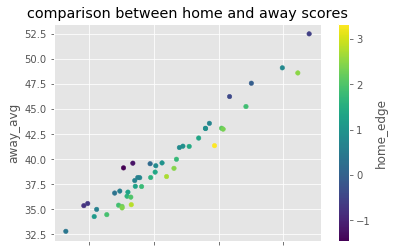

In [33]:
df_comparison.plot.scatter(x="home_avg", y='away_avg', c="home_edge", title="comparison between home and away scores",colormap='viridis')

In [34]:
top_10_edge = df_comparison.sort_values(by="home_edge",ascending = False)[:10]
bottom_10_edge = df_comparison.sort_values(by="home_edge",ascending = True)[:10]
top_10_edge
# bottom_10_edge

,PLAYER_NAME,home_avg,away_avg,home_edge
4,Blake Griffin,44.692440,41.358182,3.334258
30,Lamar Odom,38.279740,35.469444,2.810295
14,Draymond Green,40.998677,38.277228,2.721450
18,James Harden,51.110563,48.610795,2.499768
34,Pau Gasol,41.570295,39.098536,2.471759
33,Monta Ellis,37.572222,35.150152,2.422070
24,Kevin Garnett,45.356811,43.007375,2.349437
32,Marc Gasol,37.562687,35.302941,2.259745
10,Chris Paul,45.233480,43.098291,2.135190
19,Jason Kidd,38.243119,36.224432,2.018687


In [35]:
def two_sample_ttest(sample1, sample2, alpha):
    n_sample1 = len(sample1)
    n_sample2 = len(sample2)
    t_stat, P_value = stats.ttest_ind(sample1, sample2)
    t_crit = stats.t.ppf(1-(alpha/2), (n_sample1+n_sample2-2))
    mean_sample1 = round((sum(sample1)/n_sample1),3)
    mean_sample2 = round((sum(sample2)/n_sample2),3)
    mean_diff = round(abs(mean_sample1 - mean_sample2),3)
    # Outputs:
    print("Two Tail T-test:")
    print("---------------------------------------------------------------")
    print(f"Obs Number: Sample_1 = {n_sample1}   Sample_2 = {n_sample2}")
    print(f"Sample Means: Sample_1 = {mean_sample1}   Sample_2 = {mean_sample2}")
    print(f"Mean Differance: {mean_diff}")
#     sns.distplot(sample1), sns.distplot(sample2)
    print("---------------------------------------------------------------")
    print(f"t-crit: {t_crit} \nt-stat: {t_stat} \nP-value: {P_value} \nAlpha(2-Tail): {alpha/2}")
    print("---------------------------------------------------------------")
    if (abs(t_stat) > t_crit) and (P_value < (alpha/2)):
        print("|t_stat| > t_crit:",(abs(t_stat) > t_crit))
        print("P_value > Alpha(2-Tail):", (P_value < alpha))
        print("\nReject Null Hypothesis! The results shows that the samples are statistically significant.")
    else:
        print("|t_stat| > t_crit:",(abs(t_stat) > t_crit))
        print("P_value < Alpha(2-Tail):", (P_value < (alpha/2)))
        print("\nDo NOT Reject Null Hypotheses. The results are NOT statistically significant.")
    print("---------------------------------------------------------------")
    return None

Two Tail T-test:
---------------------------------------------------------------
Obs Number: Sample_1 = 46   Sample_2 = 46
Sample Means: Sample_1 = 40.779   Sample_2 = 39.661
Mean Differance: 1.118
---------------------------------------------------------------
t-crit: 1.9866745405784678 
t-stat: 1.2265362092959622 
P-value: 0.22319618918246759 
Alpha(2-Tail): 0.025
---------------------------------------------------------------
|t_stat| > t_crit: False
P_value < Alpha(2-Tail): False

Do NOT Reject Null Hypotheses. The results are NOT statistically significant.
---------------------------------------------------------------


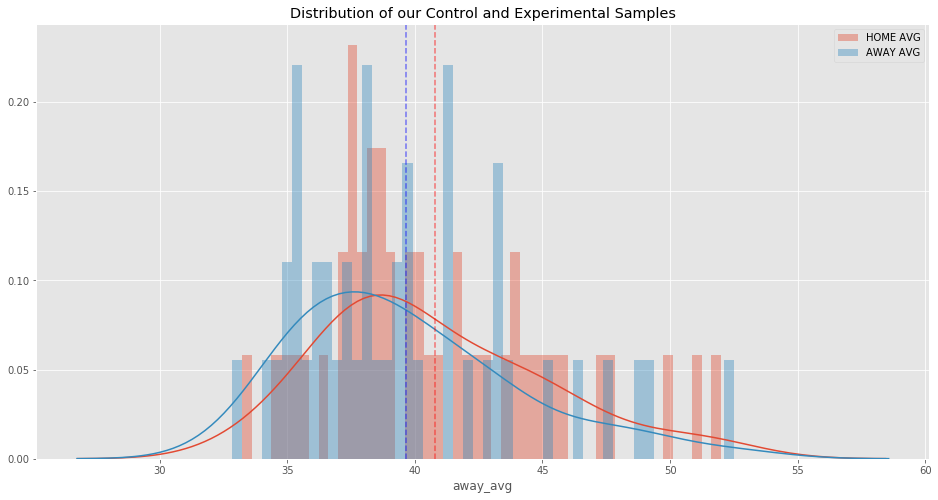

In [36]:
plt.figure(figsize=(16,8))
plt.title('Distribution of our Control and Experimental Samples')
sns.distplot(df_comparison["home_avg"], label='HOME AVG', bins=50)
sns.distplot(df_comparison["away_avg"], label='AWAY AVG',bins=50)
plt.legend()
plt.axvline(x=df_comparison["home_avg"].mean(), color='r',alpha = 0.5, linestyle='--')
plt.axvline(x=df_comparison["away_avg"].mean(), color='b',alpha = 0.5, linestyle='--')
two_sample_ttest(df_comparison["home_avg"], df_comparison["away_avg"], 0.05)

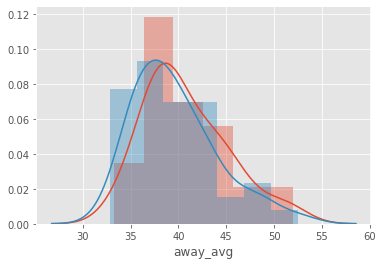

In [37]:
# df_comparison.home_edge.plot.hist(title="edge distribution")
sns.distplot(df_comparison.home_avg)
sns.distplot(df_comparison.away_avg)

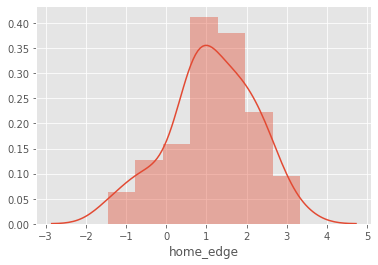

In [38]:
sns.distplot(df_comparison.home_edge)

### T-Test

In [39]:
stats.ttest_ind(df_comparison.home_avg, df_comparison.away_avg, equal_var = False)

Ttest_indResult(statistic=1.2265362092959622, pvalue=0.22319620106468846)

### Hypothesis 1: Is there a significant difference in player performance when playing Home vs Away ?

### Hypothesis 2: Is it easier for teams playing in the East to make the playoffs?

In [40]:
ranking_df.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD
0,1610612759,0,22013,2014-08-31,West,San Antonio,82,62,20,0.756,32-9,30-11
1,1610612760,0,22013,2014-08-31,West,Oklahoma City,82,59,23,0.720,34-7,25-16
2,1610612746,0,22013,2014-08-31,West,L.A. Clippers,82,57,25,0.695,34-7,23-18
3,1610612745,0,22013,2014-08-31,West,Houston,82,54,28,0.659,33-8,21-20
4,1610612757,0,22013,2014-08-31,West,Portland,82,54,28,0.659,31-10,23-18


In [86]:
seasons_ids = list(ranking_df["SEASON_ID"].unique())
seasons_df = []
for season_id in seasons_ids:
    n = str(season_id)[0]
    if n == "1":
        continue
    df = ranking_df[ranking_df["SEASON_ID"] == season_id]
    df = df.drop_duplicates(subset="TEAM")
    df["SEASON_ID"][:] = str(season_id)[1:]
    df = df.reset_index()
    df = df[["SEASON_ID", "CONFERENCE", "TEAM", "G", "W", "L", "W_PCT"]]    
    seasons_df.append(df)

In [90]:
seasons_df[1][:8]

,SEASON_ID,CONFERENCE,TEAM,G,W,L,W_PCT
0,2012,West,Oklahoma City,82,60,22,0.732
1,2012,West,San Antonio,82,58,24,0.707
2,2012,West,Denver,82,57,25,0.695
3,2012,West,L.A. Clippers,82,56,26,0.683
4,2012,West,Memphis,82,56,26,0.683
5,2012,West,Golden State,82,47,35,0.573
6,2012,West,Houston,82,45,37,0.549
7,2012,West,L.A. Lakers,82,45,37,0.549


### Hypothesis 3: Do teams win more often at home than away ?